In [1]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");

  Activating project at `~/Desktop/QuantumInspiredML`


In [2]:
using Plots
using JLD2
using Random, Distributions
using StatsBase
using Plots.PlotMeasures
using ProgressMeter

In [3]:
svpath_ns = "/Users/joshua/Desktop/QuantumInspiredML/FinalBenchmarks/ECG200/demo_imputation_plots/legendre_ns_d20_chi50.jld2";
dloc =  "../../../Data/ecg200/datasets/ecg200.jld2";

In [4]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [5]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 100 training samples and 100 testing samples.
 - 2 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 50

 Created 2 forecastable struct(s) containing class-wise mps and test samples.


In [135]:
c0_scores_mps = []
c0_scores_nn = []
interp_sites = collect(12:32)
class = 0
@threads for i in 1:36
    println("Evaluating $i")
    stats, p1_ns = any_interpolate_median(fc, class, i, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
    push!(c0_scores_mps, stats[:MAE])
    push!(c0_scores_nn, stats[:NN_MAE])
end

Evaluating 1
Evaluating 11
Evaluating 29
Evaluating 25
Evaluating 33
Evaluating 16
Evaluating 21
Evaluating 6
Evaluating 30
Evaluating 2
Evaluating 22
Evaluating 12
Evaluating 7
Evaluating 17
Evaluating 34


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516


Evaluating 26
Evaluating 3
Evaluating 23
Evaluating 18
Evaluating 13


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516


Evaluating 31
Evaluating 8
Evaluating 35
Evaluating 27
Evaluating 19
Evaluating 24
Evaluating 4
Evaluating 14
Evaluating 32
Evaluating 28
Evaluating 9
Evaluating 36
Evaluating 20
Evaluating 5
Evaluating 15
Evaluating 10


In [137]:
c1_scores_mps = []
c1_scores_nn = []
interp_sites = collect(12:32)
class = 1
@threads for i in 1:64
    println("Evaluating $i")
    stats, p1_ns = any_interpolate_median(fc, class, i, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
    push!(c1_scores_mps, stats[:MAE])
    push!(c1_scores_nn, stats[:NN_MAE])
end

Evaluating 25
Evaluating 1
Evaluating 33
Evaluating 9
Evaluating 49
Evaluating 17
Evaluating 41
Evaluating 57
Evaluating 50
Evaluating 10
Evaluating 2
Evaluating 18
Evaluating 26
Evaluating 34
Evaluating 42
Evaluating 58
Evaluating 51
Evaluating 11
Evaluating 19
Evaluating 3
Evaluating 35
Evaluating 27
Evaluating 43
Evaluating 59
Evaluating 4
Evaluating 52
Evaluating 12
Evaluating 20
Evaluating 28
Evaluating 36
Evaluating 44
Evaluating 60
Evaluating 5
Evaluating 21
Evaluating 53
Evaluating 29
Evaluating 13
Evaluating 45
Evaluating 37
Evaluating 61
Evaluating 54
Evaluating 22
Evaluating 6
Evaluating 14
Evaluating 30
Evaluating 46
Evaluating 38
Evaluating 62
Evaluating 23
Evaluating 55
Evaluating 7
Evaluating 31
Evaluating 15
Evaluating 39
Evaluating 47
Evaluating 63
Evaluating 24
Evaluating 56
Evaluating 16
Evaluating 8
Evaluating 48
Evaluating 32
Evaluating 40
Evaluating 64


In [138]:
mean(c1_scores_mps)

0.22502154352086345

In [139]:
mean(c1_scores_nn)

0.19902889378519345

In [7]:
fstyle = font("sans-serif", 23)

Plots.Font("sans-serif", 23, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

╭────────┬───────────╮
│ Metric │     Value │
├────────┼───────────┤
│    MAE │ 0.0989345 │
│ NN_MAE │  0.154558 │
╰────────┴───────────╯


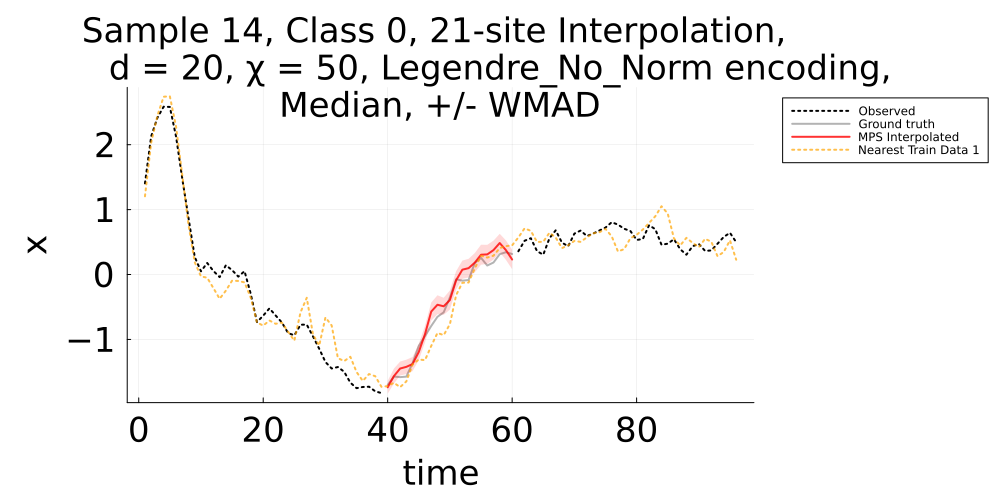

In [8]:
interp_sites = collect(40:60)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 14, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded);
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm)
#savefig("41pt6_impute_ecg200.svg")

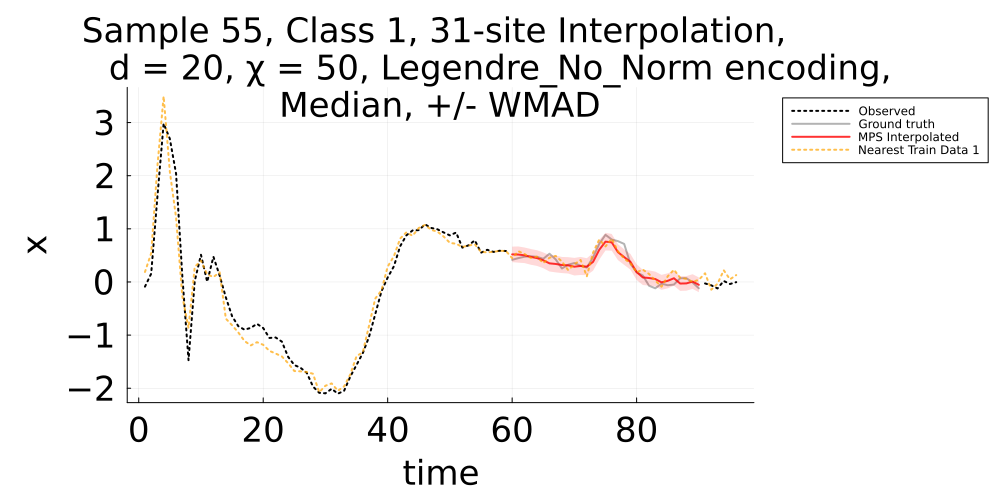

In [190]:
interp_sites = collect(60:90)
class = 1
stats, p1_ns = any_interpolate_median(fc, class, 55, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded)
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm)
#savefig("51pt2_impute_ecg200.svg")

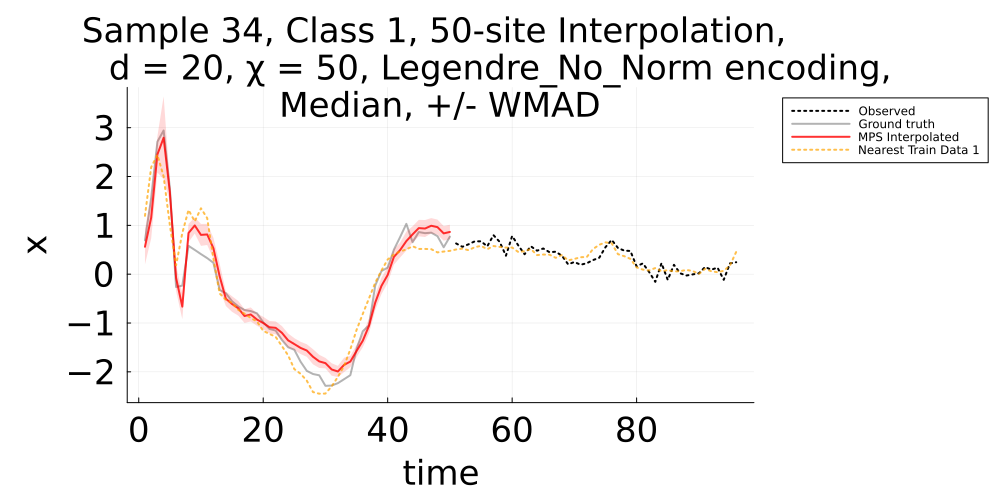

In [199]:
interp_sites = collect(1:50)
class = 1
stats, p1_ns = any_interpolate_median(fc, class, 34, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded)
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm)
#savefig("50pt1_impute_ecg200.svg")

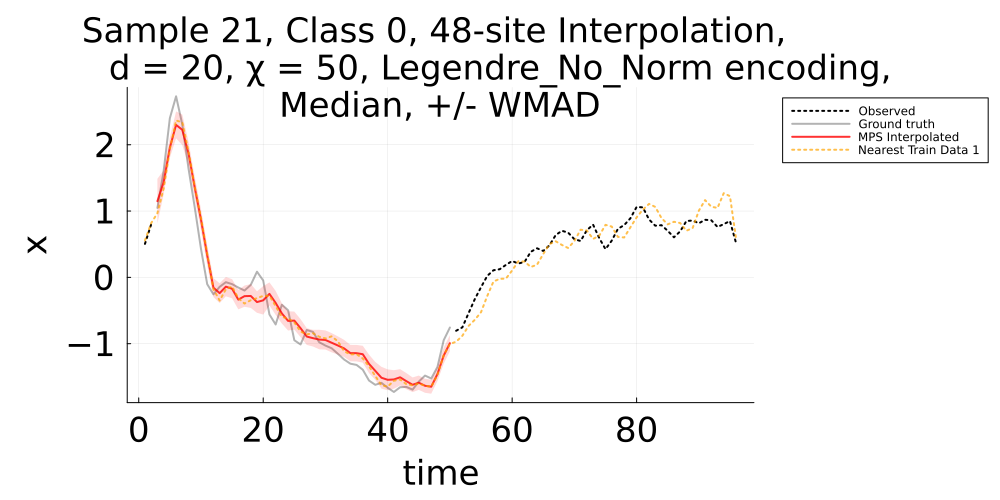

In [222]:
interp_sites = collect(3:50)
class = 0
stats, p1_ns = any_interpolate_median(fc, class, 21, interp_sites; NN_baseline=true, 
    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, wmad=true)
pretty_table(stats; header=["Metric", "Value"], header_crayon= crayon"yellow bold", tf = tf_unicode_rounded)
plot(p1_ns...,  xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,
    bottom_margin=10mm, 
    left_margin=10mm)
#savefig("48pt1_impute_ecg200.svg")

In [6]:
function generate_windows(T::Int, percent_missing::Float64, num_windows::Int)
    num_pts = round(Int, T * percent_missing)
    windows = []
    for _ in 1:num_windows
        max_start_idx = T - num_pts + 1
        # randomly select start index
        start_idx = sample(1:max_start_idx, 1; replace=false)[1]
        window_idxs = start_idx:(start_idx + num_pts - 1)
        push!(windows, window_idxs)
    end
    return windows
end


generate_windows (generic function with 1 method)

In [90]:
function n_win_evaluate(fc::Vector{forecastable}, X_train::Matrix, y_train::Vector, 
    percent_missing::Float64, num_windows::Int=30)
    # infer number of samples per class
    samps_per_class = [size(f.test_samples, 1) for f in fc]
    T = size(fc[1].test_samples, 2)
    per_class_per_instance_window_scores_mps = []
    per_class_per_instance_window_scores_nn = []
    # loop over each class
    for (i, s) in enumerate(samps_per_class)
        println("Evaluating $s samples in class $i")
        # loop over each time series INSTANCE
        per_instance_window_scores_mps = Vector{Vector{Float64}}(undef, s)
        per_instance_window_scores_nn= Vector{Vector{Float64}}(undef, s)
        for inst in 1:s
            #println("Evaluating instance $inst")
            per_window_scores_mps = Vector{Float64}(undef, num_windows)
            per_window_scores_nn = Vector{Float64}(undef, num_windows)
            windows = generate_windows(T, percent_missing, num_windows)
            @threads for wind in 1:num_windows
                interp_sites = collect(windows[wind])
                stats, p1_ns = any_interpolate_median(fc, (i-1), inst, interp_sites; NN_baseline=true, 
                    X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=false, wmad=true)
                per_window_scores_mps[wind] = stats[:MAE]
                per_window_scores_nn[wind] = stats[:NN_MAE]
            end
            # display stats
            #println("Class $i, instance $inst, $num_windows window mean: MPS - $(mean(per_window_scores_mps)) NN - $(mean(per_window_scores_nn)) ")
            per_instance_window_scores_mps[inst] = per_window_scores_mps
            per_instance_window_scores_nn[inst] = per_window_scores_nn
        end
        push!(per_class_per_instance_window_scores_mps, per_instance_window_scores_mps)
        push!(per_class_per_instance_window_scores_nn, per_instance_window_scores_nn)
    end
    return per_class_per_instance_window_scores_mps, per_class_per_instance_window_scores_nn
end

n_win_evaluate (generic function with 2 methods)

In [91]:
ps = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
per_percentage_mps = []
per_percentage_nn = []
@showprogress for p in ps
    println("EVALUATING $p percent missing data...")
    per_class_per_instance_window_scores_mps, per_class_per_instance_window_scores_nn = n_win_evaluate(fc, X_train, y_train, p, 15)
    push!(per_percentage_mps, per_class_per_instance_window_scores_mps)
    push!(per_percentage_nn, per_class_per_instance_window_scores_nn)
end

EVALUATING 0.05 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2
EVALUATING 0.15 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  20%|████████▎                                |  ETA: 0:27:13

EVALUATING 0.25 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  30%|████████████▎                            |  ETA: 0:33:53

EVALUATING 0.35 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  40%|████████████████▍                        |  ETA: 0:38:35

EVALUATING 0.45 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  50%|████████████████████▌                    |  ETA: 0:38:32

EVALUATING 0.55 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  60%|████████████████████████▋                |  ETA: 0:36:27

EVALUATING 0.65 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  70%|████████████████████████████▊            |  ETA: 0:30:04

EVALUATING 0.75 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  80%|████████████████████████████████▊        |  ETA: 0:21:06

EVALUATING 0.85 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress:  90%|████████████████████████████████████▉    |  ETA: 0:13:06

EVALUATING 0.95 percent missing data...
Evaluating 36 samples in class 1


┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:516
┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users

Evaluating 64 samples in class 2


Progress: 100%|█████████████████████████████████████████| Time: 2:20:15


In [103]:
#@save "OG_fold_imputation_results.jld2" per_percentage_mps per_percentage_nn

In [140]:
all_per_percentage_mps = [vcat([mean(i) for i in per_percentage_mps[j][1]], [mean(i) for i in per_percentage_mps[j][2]]) for j in 1:length(ps)];
means_per_percentage_mps = [mean(i) for i in all_per_percentage_mps];
medians_per_percentage_mps = [median(i) for i in all_per_percentage_mps];
stds_per_percentage_mps = [std(i) for i in all_per_percentage_mps];
all_per_percentage_nn = [vcat([mean(i) for i in per_percentage_nn[j][1]], [mean(i) for i in per_percentage_nn[j][2]]) for j in 1:length(ps)];
means_per_percentage_nn = [mean(i) for i in all_per_percentage_nn];
medians_per_percentage_nn = [median(i) for i in all_per_percentage_nn];
stds_per_percentage_nn = [std(i) for i in all_per_percentage_nn];

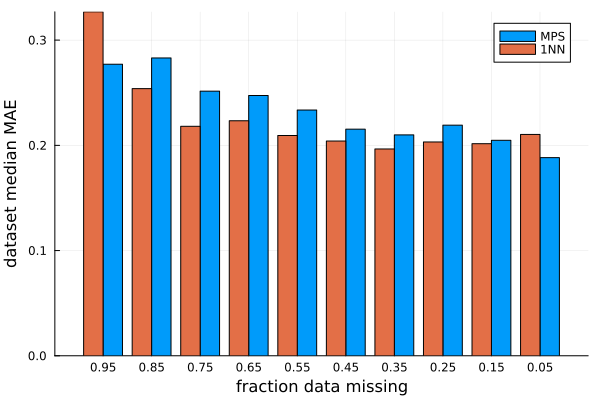

In [143]:
groupedbar(ps, 
    [medians_per_percentage_mps medians_per_percentage_nn], 
    labels=["MPS" "1NN"], legend=:topright, xticks=ps,
    xlabel="fraction data missing", 
    ylabel="dataset median MAE")
xflip!(true)

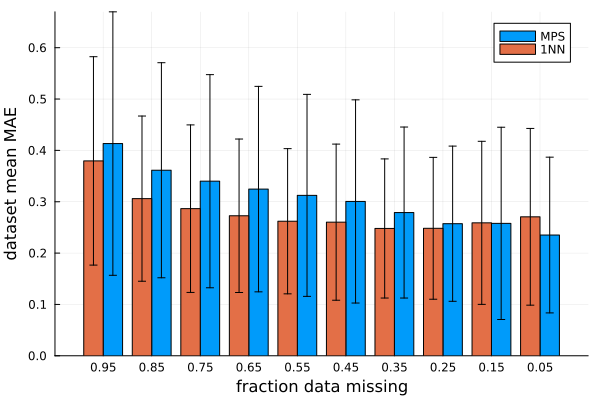

In [141]:
groupedbar(ps, 
    [means_per_percentage_mps means_per_percentage_nn], 
    yerr=[stds_per_percentage_mps stds_per_percentage_nn],
    labels=["MPS" "1NN"], legend=:topright, xticks=ps,
    xlabel="fraction data missing", 
    ylabel="dataset mean MAE")
xflip!(true)

Box/Violin?